# Time Series Analysis



This exercise covers:
- Working with datetime objects
- Time-based indexing
- Resampling and window operations
- Handling missing data in time series


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample time series data
dates = pd.date_range('2023-01-01', periods=100, freq='D')
prices = np.random.normal(100, 10, 100).cumsum()
df = pd.DataFrame({'date': dates, 'price': prices})
df.set_index('date', inplace=True)


In [2]:
print(df)

                  price
date                   
2023-01-01    89.699418
2023-01-02   179.453534
2023-01-03   293.268553
2023-01-04   393.113896
2023-01-05   503.705938
...                 ...
2023-04-06  9476.870578
2023-04-07  9585.528656
2023-04-08  9683.920308
2023-04-09  9797.833628
2023-04-10  9889.787618

[100 rows x 1 columns]


In [3]:
# Round prices to nearest integer and convert to int type
df['price'] = df['price'].round().astype(int)
print(df)

            price
date             
2023-01-01     90
2023-01-02    179
2023-01-03    293
2023-01-04    393
2023-01-05    504
...           ...
2023-04-06   9477
2023-04-07   9586
2023-04-08   9684
2023-04-09   9798
2023-04-10   9890

[100 rows x 1 columns]


### Task 1: Resampling
Your task: Resample the data to weekly frequency and calculate the mean price for each week
Expected: A Series with weekly mean prices

In [4]:
weekly_mean = df.resample('W').mean()
print(weekly_mean)

                  price
date                   
2023-01-01    90.000000
2023-01-08   493.000000
2023-01-15  1183.428571
2023-01-22  1897.571429
2023-01-29  2592.000000
2023-02-05  3282.285714
2023-02-12  3976.428571
2023-02-19  4689.428571
2023-02-26  5365.428571
2023-03-05  6051.142857
2023-03-12  6677.714286
2023-03-19  7351.857143
2023-03-26  8037.428571
2023-04-02  8713.714286
2023-04-09  9471.857143
2023-04-16  9890.000000


### Task 2: Rolling windows
Your task: Calculate a 7-day rolling average of the price
Expected: A Series with the rolling average values

In [5]:

rolling_avg = df['price'].rolling(window=7).mean()
print(rolling_avg.head(15))


date
2023-01-01            NaN
2023-01-02            NaN
2023-01-03            NaN
2023-01-04            NaN
2023-01-05            NaN
2023-01-06            NaN
2023-01-07     393.857143
2023-01-08     493.000000
2023-01-09     593.571429
2023-01-10     690.714286
2023-01-11     788.714286
2023-01-12     886.571429
2023-01-13     984.142857
2023-01-14    1083.000000
2023-01-15    1183.428571
Name: price, dtype: float64


In [6]:
# Forward fill to handle NaN values at the start
rolling_filled = rolling_avg.fillna(method='bfill')
print(rolling_filled.head(15))

date
2023-01-01     393.857143
2023-01-02     393.857143
2023-01-03     393.857143
2023-01-04     393.857143
2023-01-05     393.857143
2023-01-06     393.857143
2023-01-07     393.857143
2023-01-08     493.000000
2023-01-09     593.571429
2023-01-10     690.714286
2023-01-11     788.714286
2023-01-12     886.571429
2023-01-13     984.142857
2023-01-14    1083.000000
2023-01-15    1183.428571
Name: price, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_17992\1209076698.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rolling_filled = rolling_avg.fillna(method='bfill')


### Task 3: Time-based operations
Your task: Calculate the day-over-day percentage change in price
Expected: A Series with percentage changes

In [7]:

pct_change = df['price'].pct_change() * 100
print(pct_change.head(15))

date
2023-01-01          NaN
2023-01-02    98.888889
2023-01-03    63.687151
2023-01-04    34.129693
2023-01-05    28.244275
2023-01-06    20.238095
2023-01-07    14.191419
2023-01-08    13.294798
2023-01-09    12.627551
2023-01-10    10.192525
2023-01-11    10.894142
2023-01-12    10.194625
2023-01-13     8.410429
2023-01-14     7.370054
2023-01-15     7.442197
Name: price, dtype: float64


In [8]:
# Merge the DataFrames to include the percentage change so i can see it alongside the original price data
merged = pd.merge(df, pct_change.rename('pct_change'), on='date')
print(merged.round().head(15))

            price  pct_change
date                         
2023-01-01     90         NaN
2023-01-02    179        99.0
2023-01-03    293        64.0
2023-01-04    393        34.0
2023-01-05    504        28.0
2023-01-06    606        20.0
2023-01-07    692        14.0
2023-01-08    784        13.0
2023-01-09    883        13.0
2023-01-10    973        10.0
2023-01-11   1079        11.0
2023-01-12   1189        10.0
2023-01-13   1289         8.0
2023-01-14   1384         7.0
2023-01-15   1487         7.0


### Task 4: Handling missing data
Create some missing values

In [9]:
df_missing = df.copy()
df_missing.iloc[10:15] = np.nan
print(df_missing.head(20))


             price
date              
2023-01-01    90.0
2023-01-02   179.0
2023-01-03   293.0
2023-01-04   393.0
2023-01-05   504.0
2023-01-06   606.0
2023-01-07   692.0
2023-01-08   784.0
2023-01-09   883.0
2023-01-10   973.0
2023-01-11     NaN
2023-01-12     NaN
2023-01-13     NaN
2023-01-14     NaN
2023-01-15     NaN
2023-01-16  1585.0
2023-01-17  1692.0
2023-01-18  1790.0
2023-01-19  1893.0
2023-01-20  2004.0


### Your task: Handle the missing values using the following methods:
 1. Forward fill
 2. Linear interpolation
 3. Rolling window imputation (7-day window)
 Expected: Three different Series with different imputation methods

In [10]:

ffill = df_missing.fillna(method='ffill')
interpolated = df_missing.interpolate(method='linear')
rolling = df_missing.rolling(window=7, min_periods=1).mean()
print("Forward Fill:\n", ffill.head(20))

Forward Fill:
              price
date              
2023-01-01    90.0
2023-01-02   179.0
2023-01-03   293.0
2023-01-04   393.0
2023-01-05   504.0
2023-01-06   606.0
2023-01-07   692.0
2023-01-08   784.0
2023-01-09   883.0
2023-01-10   973.0
2023-01-11   973.0
2023-01-12   973.0
2023-01-13   973.0
2023-01-14   973.0
2023-01-15   973.0
2023-01-16  1585.0
2023-01-17  1692.0
2023-01-18  1790.0
2023-01-19  1893.0
2023-01-20  2004.0


C:\Users\hp\AppData\Local\Temp\ipykernel_17992\3184226703.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ffill = df_missing.fillna(method='ffill')


In [11]:
print("Linear Interpolation:\n", interpolated.head(20))

Linear Interpolation:
              price
date              
2023-01-01    90.0
2023-01-02   179.0
2023-01-03   293.0
2023-01-04   393.0
2023-01-05   504.0
2023-01-06   606.0
2023-01-07   692.0
2023-01-08   784.0
2023-01-09   883.0
2023-01-10   973.0
2023-01-11  1075.0
2023-01-12  1177.0
2023-01-13  1279.0
2023-01-14  1381.0
2023-01-15  1483.0
2023-01-16  1585.0
2023-01-17  1692.0
2023-01-18  1790.0
2023-01-19  1893.0
2023-01-20  2004.0


In [12]:
print("Rolling Window Imputation:\n", rolling.head(20))


Rolling Window Imputation:
                   price
date                   
2023-01-01    90.000000
2023-01-02   134.500000
2023-01-03   187.333333
2023-01-04   238.750000
2023-01-05   291.800000
2023-01-06   344.166667
2023-01-07   393.857143
2023-01-08   493.000000
2023-01-09   593.571429
2023-01-10   690.714286
2023-01-11   740.333333
2023-01-12   787.600000
2023-01-13   833.000000
2023-01-14   880.000000
2023-01-15   928.000000
2023-01-16  1279.000000
2023-01-17  1638.500000
2023-01-18  1689.000000
2023-01-19  1740.000000
2023-01-20  1792.800000


### Task 6: Visualization
Your task: Create a plot with the following elements:
 1. Original price series
 2. 7-day rolling average
 3. Highlight periods with missing values
 Expected: A single plot with all elements clearly labeled


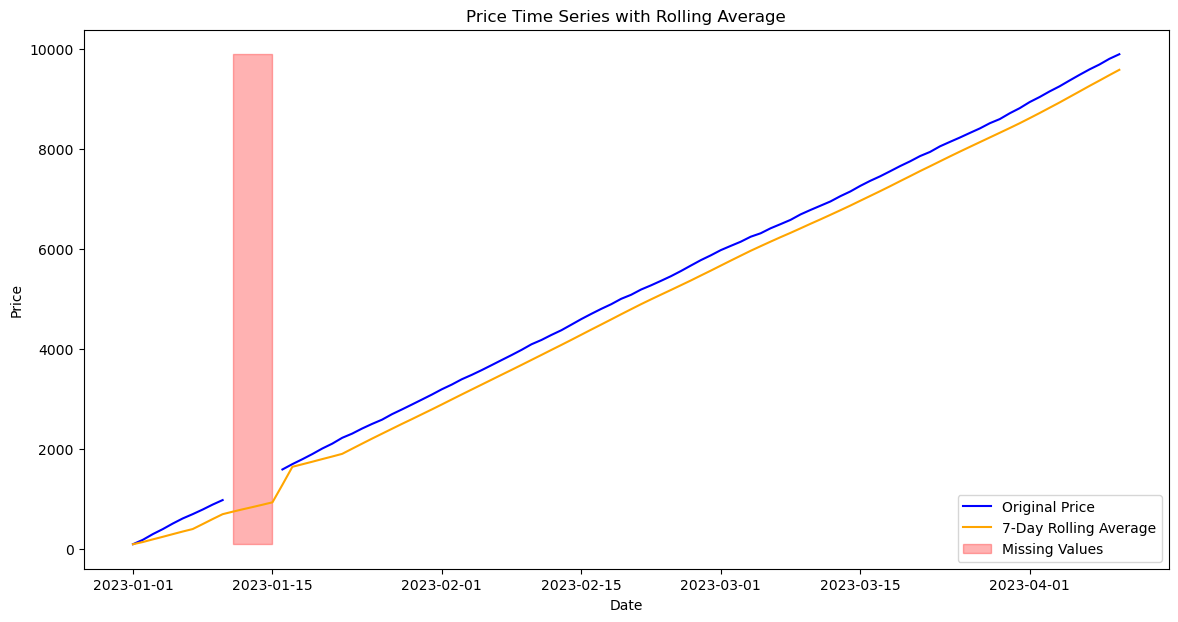

In [13]:
# --- 2. Calculations ---
# Calculate the 7-day rolling average. The `min_periods=1` ensures it calculates
# even if there are fewer than 7 data points at the start.
df_missing['rolling_avg_7d'] = df_missing['price'].rolling(window=7, min_periods=1).mean()
# Identify missing values
df_missing['is_missing'] = df_missing['price'].isna()
# --- 3. Plotting ---
plt.figure(figsize=(14, 7))
plt.plot(df_missing.index, df_missing['price'], label='Original Price', color='blue')
plt.plot(df_missing.index, df_missing['rolling_avg_7d'], label='7-Day Rolling Average', color='orange')
# Highlight missing value periods
plt.fill_between(df_missing.index, df_missing['price'].min(), df_missing['price'].max(), where=df_missing['is_missing'], color='red', alpha=0.3, label='Missing Values')
plt.title('Price Time Series with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
